**Group ID: 56**

**Group Members Name with Student ID:**

1. PRABIR SINHA (2023AA05789)
2. SIDDHARTHA SANDILYA (2023AA05705)
3. RAVI RANJAN PANDEY (2023AA05002)
4. AJAY KUMAR NAYAK (2023AA05482)

**Problem Statement**

The objective of the problem is to implement an Actor-Critic reinforcement learning algorithm to optimize energy consumption in a building. The agent should learn to adjust the temperature settings dynamically to minimize energy usage while maintaining comfortable indoor conditions.

 **Dataset Details**

Dataset: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

This dataset contains energy consumption data for a residential building, along with various environmental and operational factors.

Data Dictionary:
* Appliances:       Energy use in Wh
* lights:           Energy use of light fixtures in the house in Wh
* T1 - T9:          Temperatures in various rooms and outside
* RH_1 to RH_9:     Humidity measurements in various rooms and outside
* Visibility:       Visibility in km
* Tdewpoint:       Dew point temperature
* Pressure_mm_hgg:  Pressure in mm Hg
* Windspeed:        Wind speed in m/s

**Environment Details**

**State Space:**
The state space consists of various features from the dataset that impact energy consumption and comfort levels.

* Current Temperature (T1 to T9): Temperatures in various rooms and outside.
* Current Humidity (RH_1 to RH_9): Humidity measurements in different locations.
* Visibility (Visibility): Visibility in meters.
* Dew Point (Tdewpoint): Dew point temperature.
* Pressure (Press_mm_hg): Atmospheric pressure in mm Hg.
* Windspeed (Windspeed): Wind speed in m/s.

Total State Vector Dimension: Number of features = 9 (temperature) + 9 (humidity) + 1 (visibility) + 1 (dew point) + 1 (pressure) + 1 (windspeed) = 22 features

**Target Variable:** Appliances (energy consumption in Wh).

**Action Space:**
The action space consists of discrete temperature adjustments:
* Action 0: Decrease temperature by 1°C
* Action 1: Maintain current temperature
* Action 2: Increase temperature by 1°C


- If the action is to decrease the temperature by 1°C, you'll adjust each temperature feature (T1 to T9) down by 1°C.
- If the action is to increase the temperature by 1°C, you'll adjust each temperature feature (T1 to T9) up by 1°C.
- Other features remain unchanged.

**Policy (Actor):** A neural network that outputs a probability distribution over possible temperature adjustments.

**Value function (Critic):** A neural network that estimates the expected cumulative reward (energy savings) from a given state.

**Reward function:**
The reward function should reflect the overall comfort and energy efficiency based on all temperature readings. i.e., balance between minimising temperature deviations and minimizing energy consumption.

* Calculate the penalty based on the deviation of each temperature from the target temperature and then aggregate these penalties.
* Measure the change in energy consumption before and after applying the RL action.
* Combine the comfort penalty and energy savings to get the final reward.

*Example:*

Target temperature=22°C

Initial Temperatures: T1=23, T2=22, T3=21, T4=23, T5=22, T6=21, T7=24, T8=22, T9=23

Action Taken: Decrease temperature by 1°C for each room

Resulting Temperatures: T1 = 22, T2 = 21, T3 = 20, T4 = 22, T5 = 21, T6 = 20, T7 = 23, T8 = 21, T9 = 22

Energy Consumption: 50 Wh (before RL adjustment) and 48 Wh (after RL adjustment)
* Energy Before (50 Wh): Use the energy consumption from the dataset at the current time step.
* Energy After (48 Wh): Use the energy consumption from the dataset at the next time step (if available).

Consider only temperature features for deviation calculation.

Deviation = abs (Ti− Ttarget )

Deviations=[ abs(22−22), abs(21−22), abs(20−22), abs(22−22),  abs(21−22), abs(20−22), abs(23−22), abs(21−22), abs(22−22) ]

Deviations = [0, 1, 2, 0, 1, 2, 1, 1, 0], Sum of deviations = 8

Energy Savings = Energy Before−Energy After = 50 – 48 = 2Wh

Reward= −Sum of Deviations + Energy Savings = -8+6 = -2

**Code Execution**

In [1]:
### write your code below this line
# Load the dataset and preprocessing it for featrure and target selection

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
data = pd.read_csv(url)

# Check the first few rows and data structure
#data.head(), data.info()
print(data.head())

# Replace missing values (if any)
data.fillna(method='ffill', inplace=True)

# Features and target selection
features = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
            'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9',
            'Visibility', 'Tdewpoint', 'Press_mm_hg', 'Windspeed']
target = ['Appliances']

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Normalize features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"-------OPtional for Debug ---------------")
print(f"Dimensions of DataFrame: {data.shape}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Dimensions of y_test: {y_test.shape}")

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

C:\Users\sddhr\AppData\Local\Temp\ipykernel_6356\1756349641.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Calculate baseline energy consumption

# Selecting all temperature columns (T1 to T9) and energy consumption (Appliances)
selected_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'Appliances']
data_selected = data[selected_columns]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data_selected, test_size=0.2, random_state=0)

def calculate_baseline_total_energy_consumption(test_data):
    # Sum the energy consumption in the test data
    baseline_total_energy_consumption = test_data['Appliances'].sum()
    return baseline_total_energy_consumption

def calculate_baseline_average_energy_consumption(test_data):
    # Average  the energy consumption in the test data
    baseline_average_energy_consumption = test_data['Appliances'].mean()
    return baseline_average_energy_consumption

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

# Converting the normalized data back into DataFrame for readability
train_data_normalized_df = pd.DataFrame(train_data_normalized, columns=selected_columns)
test_data_normalized_df = pd.DataFrame(test_data_normalized, columns=selected_columns)



# Calculate baseline energy consumption
Total_baseline_energy_consumption = calculate_baseline_total_energy_consumption(test_data_normalized_df)
print(f"Total Baseline Energy Consumption: {Total_baseline_energy_consumption} kWh")

Average_baseline_energy_consumption = calculate_baseline_average_energy_consumption(test_data_normalized_df)
print(f"Average Baseline Energy Consumption: {Average_baseline_energy_consumption} kWh")


Total Baseline Energy Consumption: 329.5514018691589 kWh
Average Baseline Energy Consumption: 0.0834941479273268 kWh


**Create an EnergyConsumption Environment (1 M)**

In [25]:
### write your code below this line
# Create the Energy Consumption Environment Class

import numpy as np

# Define temperature adjustment functions
def IncreaseTemperature(state):
    state[:9] += 1  # Adjust increase in temperature
    return state

def DecreaseTemperature(state):
    state[:9] -= 1  # Adjust decrease in temperature
    return state

def MaintainCurrentTemperature(state):
    return state  # No change in temperature


class EnergyConsumptionEnv:
    def __init__(self, X_train, y_train, target_temp=22, max_steps=10):
        self.X = X_train
        self.y = y_train
        self.target_temp = target_temp
        self.current_index = 0
        self.state = None
        self.action_space = [0, 1, 2]   # 0: Decrease, 1: Maintain, 2: Increase
        self.steps_taken = 0            # Track steps in the episode
        self.max_steps = max_steps      # Limit steps per episode
        self.reset()
        self.total_energy_consumed = 0  # Initialize total energy consumed

    def reset(self):
        self.current_index = np.random.randint(0, len(self.X))
        self.state = self.X[self.current_index].copy()
        self.steps_taken = 0
        self.total_energy_consumed = 0  # Reset the energy consumption at the start of an episode
        return self.state


    def step(self, action):
        #Actions: 0 - Decrease, 1 - Maintain, 2 - Increase temperature
        if action == 0:
            self.state = DecreaseTemperature(self.state) # Increase temperatures by 1°C
        elif action == 1:
            self.state = MaintainCurrentTemperature(self.state) # Maintian the same temperatures
        elif action == 2:
            self.state = IncreaseTemperature(self.state) # Decrease temperatures by 1°C

        # Calculate energy consumption and reward
        energy_before = self.y[self.current_index]

        # Instead of advancing sequentially, randomly pick the next state
        self.current_index = np.random.randint(0, len(self.X))
        energy_after = self.y[self.current_index]

        # Compute deviation from the target temperature
        deviations = np.abs(self.state[:9] - self.target_temp)
        comfort_penalty = np.sum(deviations)

        # Calculate energy savings
        energy_savings = energy_before - energy_after
        
        # Track energy consumption
        self.total_energy_consumed += energy_after  # Add to total energy consumed

        # Penalize for temperature deviations and reward for energy savings
        reward = -comfort_penalty + (0.01 * energy_savings)  # Adjust weighting factor (0.01) for energy savings impact

        # We can define a better episode end condition (e.g., based on a maximum number of steps)
        self.steps_taken += 1
        # End after max_steps
        done = self.steps_taken >= self.max_steps  

        print(f"Action: {action}, Energy Before: {energy_before}, Energy After: {energy_after}, Reward: {reward}, Done: {done}")
        
        return self.state, reward, self.total_energy_consumed, done

    def get_action_space(self):
        return self.action_space

    def get_state_space(self):
        return self.state.shape

    def print_state_space(self):
        print_state_space(self)

    def print_action_space(self):
        print_action_space(self)

# Initialize the environment
env = EnergyConsumptionEnv(X_train, y_train)
print(f"State space: {env.get_state_space()}")
print(f"Action space: {env.get_action_space()}")

State space: (22,)
Action space: [0, 1, 2]


**Print state space and action space (0.5 M)**

In [26]:
### write your code below this line
# Function defination for printing the State and Action space of the environment

def print_state_space(self):
    """Print the state space: current temperatures, humidity, visibility, etc."""
    print("State Space:")
    print(" --------------------------")
    print(f"State shape: {self.state.shape}")
    # Adjust according to the actual size of self.state
    print(f"Temperature: {self.state[0:9]}")
    # Example adjustments:
    # Assuming the state has the following structure:
    # Index 0-8: Temperature-related features
    # Index 9: Humidity
    # Index 10: Visibility
    # Index 11: Dew Point
    # Index 12: Pressure
    # Index 13: Wind Speed

    if self.state.shape[0] > 9:
        print(f"Humidity: {self.state[9]}")
    if self.state.shape[0] > 10:
        print(f"Visibility: {self.state[10]} km")
    if self.state.shape[0] > 11:
        print(f"Dew Point: {self.state[11]}")
    if self.state.shape[0] > 12:
        print(f"Pressure: {self.state[12]} mm Hg")
    if self.state.shape[0] > 13:
        print(f"Wind Speed: {self.state[13]} km/h")
        print(" --------------------------")



def print_action_space(self):
    """Print the action space (e.g., Decrease, Maintain, Increase temperature)."""
    print("Action Space:")
    print(" --------------------------")
    print("0: Decrease Temperature")
    print("1: Maintain Current Temperature")
    print("2: Increase Temperature")
    print(" --------------------------")

**Clearly define the parameters used for training an AI agent. (1 M)**
* Number of episodes
* Max capacity of replay memory
* Batch size
* Period of Q target network updates
* Discount factor for future rewards
* Initial value for epsilon of the e-greedy
* Final value for epsilon of the e-greedy
* Learning rate of ADAM optimizer, and etc.

In [27]:
### write your code below this line
# Specify the Training parameters

num_episodes = int(input("Enter a number:"))
gamma = 0.99                    # Discount factor for future rewards
epsilon_start = 1.0             # Initial epsilon for e-greedy
epsilon_end = 0.01              # Final epsilon value
epsilon_decay = 0.995           # Decay rate for epsilon
learning_rate = 0.001           # Learning rate for the optimizer
batch_size = 64                 # Batch size
target_update_period = 10       # Period to update the target network
replay_memory_capacity = 10000  # Replay buffer capacity

Enter a number: 5


**Define the separate functions for DecreaseTemperature, IncreaseTemperature and MaintainCurrentTemperature actions. (1.5 M)**

In [28]:
### write your code below this line
# Define the temperature adjustment functions (Actions:  Increase, Decrease and Maintain)

def DecreaseTemperature(state):
    state[:9] -= 1  # Decrease all room temperatures by 1°C
    return state

def IncreaseTemperature(state):
    state[:9] += 1  # Increase all room temperatures by 1°C
    return state

def MaintainCurrentTemperature(state):
    return state  # No change to the temperature

**Implement a replay buffer for storing the experiences. (0.5 M)**

In [29]:
### write your code below this line
# Implement the replay buffer for Storing experiences

import numpy as np
from collections import deque

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def add(self, experience):
        """Add experience to the buffer.
        Experience should be a tuple (state, action, reward, next_state, done)
        """
        self.buffer.append(experience)

    def sample(self, batch_size):
        """Sample a batch of experiences from the buffer."""
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        batch = [self.buffer[idx] for idx in indices]
        return batch

    def size(self):
        """Return the current size of the buffer."""
        return len(self.buffer)


**Design network DQN (0.5 M)**

In [30]:
# Design the  DQN (Deep Q-Network) model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


state_size = env.get_state_space()

def create_dqn_network(state_size, action_size, learning_rate=0.001):
    model = tf.keras.Sequential([
        Input(shape=(state_size,)),
        Dense(64, activation='relu', input_shape=(state_size,)),
        Dense(32, activation='relu'),
        Dense(action_size, activation='sigmoid')  # Outputs Q-values for each action
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model


In [31]:
# Specify the defination of DQN (Deep Q-network model) Learning Agent

def dqn_learning_agent(env, dqn_model, target_dqn_model, episodes,
                       epsilon_start, epsilon_end, epsilon_decay, gamma, batch_size, replay_buffer, target_update_period):
    epsilon = epsilon_start
    
    state = env.reset()
    # Reset action counters for each episode
    episode_increase = 0
    episode_decrease = 0
    episode_maintain = 0
    total_reward = 0
    total_energy_consumed = 0  # Initialize total energy consumed
    done = False
    step_count = 0  # Step counter for each episode

    while not done and step_count < max_steps_per_episode:
        #env.print_state_space()  # Optional for debugging
        if done:
            break

        if np.random.rand() <= epsilon:
            action = np.random.choice(env.get_action_space())
        else:
            q_values = dqn_model.predict(state.reshape(1, -1))
            action = np.argmax(q_values)

        # Increment the appropriate action counter
        if action == 0:  # Decrease Temperature
            episode_decrease += 1
        elif action == 1:  # Maintain Current Temperature
            episode_maintain += 1
        elif action == 2:  # Increase Temperature
            episode_increase += 1

        # Print chosen action
        #env.print_action_space()  # Optional for debugging
        print(f"Chosen Action: {action}")

        next_state, reward, energy_consumed, done = env.step(action)
        total_reward += reward
        total_energy_consumed += energy_consumed  # Accumulate total energy consumed

        # Add the experience to replay buffer
        replay_buffer.add((state, action, reward, next_state, done))

        if replay_buffer.size() >= batch_size:
            minibatch = replay_buffer.sample(batch_size)

            for state_mb, action_mb, reward_mb, next_state_mb, done_mb in minibatch:
                    
                # DQN: Both action selection and target calculation use the same model
                target_q = reward_mb
                    
                if not done_mb:
                        
                    # Use the DQN model to predict the max Q-value of the next state
                    target_q += gamma * np.max(dqn_model.predict(next_state_mb.reshape(1, -1)))
                    
                # Update the Q-values
                q_values = dqn_model.predict(state_mb.reshape(1, -1))
                q_values[0][action_mb] = np.array(target_q).item()
                    
                # Train the DQN model
                dqn_model.fit(state_mb.reshape(1, -1), q_values, verbose=0)

        # Update step count and state
        step_count += 1
        state = next_state

    # Update epsilon
    epsilon = max(epsilon_end, epsilon_decay * epsilon)

    if episodes % target_update_period == 0:
        target_dqn_model.set_weights(dqn_model.get_weights())

    print(f"Episode {episodes+1}, Total DQN Rewards: {total_reward}")
    print(f"Temperature Increase count_dqn: {episode_increase}, Temperature Decrease count_dqn: {episode_decrease}, Temperature Maintain count_dqn: {episode_maintain}")
    print(f"Total Energy Consumed in Episode: {total_energy_consumed} kWh")

    return episode_increase, episode_decrease, episode_maintain, total_reward, total_energy_consumed

**Training Iterations (0.5 M)**
Note: print all the episodes with the values of investment and buying. (if not printed then -1 will be done.)

In [33]:
# Train the DQN Agent w.r.t to the environment
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Set seed for reproducibility (Optional)
np.random.seed(42)
tf.random.set_seed(42)

# Initialize the Energy Consumption Environment for DQN training
env = EnergyConsumptionEnv(X_train, y_train, target_temp=22, max_steps=10)

# Hyperparameters for DQN training
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
learning_rate = 0.001
gamma = 0.99
batch_size = 32
target_update_period = 10
num_episodes = int(input("Enter a number:"))
replay_memory_capacity = 10000
max_steps_per_episode = 10

# DQN model setup
state_size = env.get_state_space()[0]  # Assuming the state is a vector
action_size = len(env.get_action_space())
print(f"State size: {state_size}")
print(f"Action size: {action_size}")

# Instantiate DQN Q-Network
dqn_model = create_dqn_network(state_size, action_size)

# Instantiate the DQN Target-Network
target_dqn_model = create_dqn_network(state_size, action_size)

# Sync target DQN Target-Network model with Main DQN Q-Network model
target_dqn_model.set_weights(dqn_model.get_weights())

# Instantiate the replay buffer
replay_buffer = ReplayBuffer(replay_memory_capacity)


Enter a number: 5


State size: 22
Action size: 3


C:\Users\sddhr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chosen Action: 0
Action: 0, Energy Before: [-0.46521548], Energy After: [-0.56275525], Reward: [-213.71150484], Done: False
Chosen Action: 2
Action: 2, Energy Before: [-0.56275525], Energy After: [-0.75783477], Reward: [-204.71052945], Done: False
Chosen Action: 0
Action: 0, Energy Before: [-0.75783477], Energy After: [-0.36767572], Reward: [-213.71638183], Done: False
Chosen Action: 2
Action: 2, Energy Before: [-0.36767572], Energy After: [-0.56275525], Reward: [-204.71052945], Done: False
Chosen Action: 1
Action: 1, Energy Before: [-0.56275525], Energy After: [-0.46521548], Reward: [-204.71345564], Done: False
Chosen Action: 0
Action: 0, Energy Before: [-0.46521548], Energy After: [-0.07505644], Reward: [-213.71638183], Done: False
Chosen Action: 1
Action: 1, Energy Before: [-0.07505644], Energy After: [-0.66029501], Reward: [-213.70662786], Done: False
Chosen Action: 0
Action: 0, Energy Before: [-0.66029501], Energy After: [-0.36767572], Reward: [-222.71540644], Done: False
Chosen A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Episode 7, Total DQN Rewards: [-1946.54934114], Steps Taken: 10
Temperature Increase count_dqn: 4, Temperature Decrease count_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Chosen Action: 1
Action: 1, Energy Before: [-0.1725962], Energy After: [0.51018213], Reward: [-213.61610621], Done: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Chosen Action: 2
Action: 2, Energy Before: [0.12002308], Energy After: [0.21756285], Reward: [-155.80812907], Done: False
1/1 

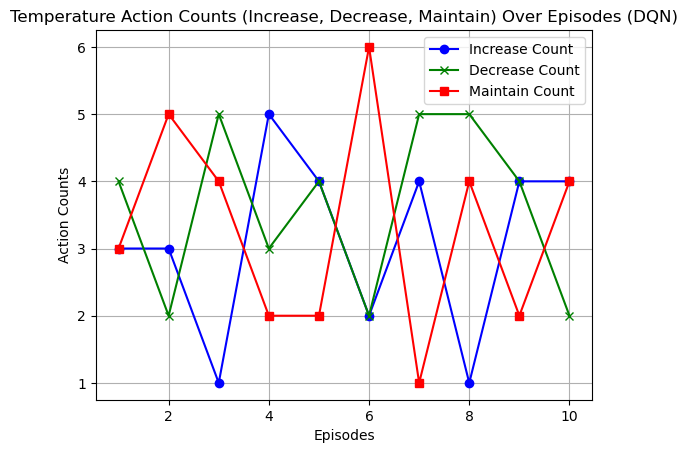

In [ ]:
# Independent analysis plot for DQN only ( Temperature variation counts over episodes)
import matplotlib.pyplot as plt

# Assume the counts and rewards are returned by dqn_learning_agent
increase_count_dqn = []
decrease_count_dqn = []
maintain_count_dqn = []
total_energy_dqn = []

episodes = num_episodes 

for i in range(episodes):

    # Train DQN learning agent
    episode_increase_dqn, episode_decrease_dqn, episode_maintain_dqn, total_reward_dqn, episode_total_energy_dqn  = dqn_learning_agent(
        env,
        dqn_model,
        target_dqn_model,
        i,
        # max_steps_per_episode=max_steps_per_episode,
        epsilon_start=epsilon_start,
        epsilon_end=epsilon_end,
        epsilon_decay=epsilon_decay,
        gamma=gamma,
        batch_size=batch_size,
        replay_buffer=replay_buffer,
        target_update_period=target_update_period
    )
    
    increase_count_dqn.append(episode_increase_dqn)
    decrease_count_dqn.append(episode_decrease_dqn)
    maintain_count_dqn.append(episode_maintain_dqn)
    total_energy_dqn.append(episode_total_energy_dqn)
    
# now plot the results
iterations = range(1, episodes + 1)
plt.plot(iterations, increase_count_dqn, label='Increase Count', marker='o', color='blue')
plt.plot(iterations, decrease_count_dqn, label='Decrease Count', marker='x', color='green')
plt.plot(iterations, maintain_count_dqn, label='Maintain Count', marker='s', color='red')

# Adding title and labels
plt.title("Temperature Action Counts (Increase, Decrease, Maintain) Over Episodes (DQN)")
plt.xlabel("Episodes")
plt.ylabel("Action Counts")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


**Design network DDQN (0.5 M)**

In [12]:
# Design the DDQN (Double DeepQ- Network) model
# The network architecture is the same DQN  

# Specify the defination of DDQN ( Double Deep Q-network model) Learning Agent

def ddqn_learning_agent(env, ddqn_model, target_ddqn_model, episodes, max_steps_per_episode,
                       epsilon_start, epsilon_end, epsilon_decay, gamma, batch_size, replay_buffer, target_update_period):
    epsilon = epsilon_start

    state = env.reset()
    # Reset action counters for each episode
    episode_increase = 0
    episode_decrease = 0
    episode_maintain = 0
    total_reward = 0
    total_energy_consumed = 0  # Initialize total energy consumed
    done = False
    step_count = 0  # Step counter for each episode

    while not done and step_count < max_steps_per_episode:
        #env.print_state_space()  # Optional for debugging
        if done:
            break

        # Epsilon-greedy action selection
        if np.random.rand() <= epsilon:
            action = np.random.choice(env.get_action_space())
        else:
            q_values = ddqn_model.predict(state.reshape(1, -1))
            action = np.argmax(q_values)

        # Increment the appropriate action counter
        if action == 0:  # Decrease Temperature
            episode_decrease+= 1
        elif action == 1:  # Maintain Current Temperature
            episode_maintain += 1
        elif action == 2:  # Increase Temperature
            episode_increase += 1

        # Print chosen action
        #env.print_action_space()  # Optional for debugging
        print(f"Chosen Action: {action}")

        # Execute action and observe the outcome
        next_state, reward, energy_consumed, done = env.step(action)
        total_reward += reward
        total_energy_consumed += energy_consumed  # Accumulate total energy consumed

        # Store experience in replay buffer
        replay_buffer.add((state, action, reward, next_state, done))

        # Sample a batch of experiences from the replay buffer
        if replay_buffer.size() >= batch_size:

            minibatch = replay_buffer.sample(batch_size)

            for state_mb, action_mb, reward_mb, next_state_mb, done_mb in minibatch:
                    
                # DDQN: Action selection and target calculation use different models
                target_q = reward_mb  # Immediate reward

                if not done_mb:
                    # Use the current DQN model (for Double DQN) to select the next action
                    next_action = np.argmax(ddqn_model.predict(next_state_mb.reshape(1, -1)))

                    # Use the target DDQN model to compute the Q-value of the selected action
                    target_q += gamma * target_ddqn_model.predict(next_state_mb.reshape(1, -1))[0][next_action].item()  # Ensure scalar

                # Get the Q-values predicted by the current network for the current state
                q_values = ddqn_model.predict(state_mb.reshape(1, -1))

                # Update the Q-value for the action taken
                q_values[0][action_mb] = np.array(target_q).item()  # Ensure scalar

                # Train the DDQN model
                # Train the current network with the updated Q-values
                ddqn_model.fit(state_mb.reshape(1, -1), q_values, verbose=0)

        # Update step count and state
        step_count += 1
        # Update the state for the next step
        state = next_state

    # Update epsilon
    epsilon = max(epsilon_end, epsilon_decay * epsilon)

    # Sync target model with DQN model periodically
    if episodes % target_update_period == 0:
        target_ddqn_model.set_weights(ddqn_model.get_weights())

    print(f"Episode {episodes+1}, Total Reward: {total_reward}, Steps Taken: {step_count}")
    print(f"Increase Tempr count_ddqn: {episode_increase}, Decrease Tempr count_ddqn: {episode_decrease}, Maintain Tempr count_ddqn: {episode_maintain}")
    print(f"Total Energy Consumed in Episode : {total_energy_consumed} kWh")
    return episode_increase,episode_decrease,episode_maintain, total_reward, total_energy_consumed

**Training Iterations (0.5 M)**
Note: print all the episodes with the values of investment and buying. (if not printed then -1 will be done.)

In [20]:
# Train the DDQN Agent w.r.t to the environment
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Initialize the environment
env = EnergyConsumptionEnv(X_train, y_train, target_temp=22, max_steps=2)

# Hyperparameters for DDQN training
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
learning_rate = 0.001
gamma = 0.99
batch_size = 32
target_update_period = 10
num_episodes = int(input("Enter a number:"))
replay_memory_capacity = 10000
# max_steps_per_episode = 10


# DDQN model setup
state_size = env.get_state_space()[0]
action_size = len(env.get_action_space())
print(f"State size: {state_size}")
print(f"Action size: {action_size}")

# instantiate DDQN Q-Network
ddqn_model = create_dqn_network(state_size, action_size)

# instantiate DDQN Target Network
target_ddqn_model = create_dqn_network(state_size, action_size)

# Sync target DDQN Target-Network model with Main DDQN Q-Network model
target_ddqn_model.set_weights(dqn_model.get_weights())

# Instantiate the replay buffer
replay_buffer = ReplayBuffer(replay_memory_capacity)


Enter a number: 5


State size: 22
Action size: 3


In [23]:
# Independent analysis plot for DDQN only ( Temperature variation counts over episodes)
import matplotlib.pyplot as plt

# Assume the counts and rewards are returned by ddqn_learning_agent
increase_count_ddqn = []
decrease_count_ddqn = []
maintain_count_ddqn = []
total_energy_ddqn = []

episodes = num_episodes 

for i in range(episodes):

    # Train DDQN agent
    episode_increase_ddqn, episode_decrease_ddqn, episode_maintain_ddqn, total_reward_ddqn, episode_total_energy_ddqn  = ddqn_learning_agent(
        env,
        ddqn_model,
        target_ddqn_model,
        i,
        # max_steps_per_episode=max_steps_per_episode,
        epsilon_start=epsilon_start,
        epsilon_end=epsilon_end,
        epsilon_decay=epsilon_decay,
        gamma=gamma,
        batch_size=batch_size,
        replay_buffer=replay_buffer,
        target_update_period=target_update_period
    ) 
    increase_count_ddqn.append(episode_increase_ddqn)
    decrease_count_ddqn.append(episode_decrease_ddqn)
    maintain_count_ddqn.append(episode_maintain_ddqn)
    total_energy_ddqn.append(episode_total_energy_ddqn)
    
# now plot the results
iterations = range(1, episodes + 1)
plt.plot(iterations, increase_count_ddqn, label='Increase Count', marker='o', color='blue')
plt.plot(iterations, decrease_count_ddqn, label='Decrease Count', marker='x', color='green')
plt.plot(iterations, maintain_count_ddqn, label='Maintain Count', marker='s', color='red')

# Adding title and labels
plt.title("Action Counts (Increase, Decrease, Maintain) Over Episodes (DDQN)")
plt.xlabel("Episodes")
plt.ylabel("Action Counts")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

TypeError: ddqn_learning_agent() missing 1 required positional argument: 'max_steps_per_episode'

**Plot the graph for agents for decreasing, increasing, and maintaining the temperature for DQN and DDQN together. (0.5)**

In [22]:
import matplotlib.pyplot as plt

# Assume the counts and rewards are returned by dqn_learning_agent
increase_count_dqn = []
decrease_count_dqn = []
maintain_count_dqn = []
total_dqn_reward = []
total_energy_dqn = []


# Assume the counts and rewards are returned by ddqn_learning_agent
increase_count_ddqn = []
decrease_count_ddqn = []
maintain_count_ddqn = []
total_ddqn_reward = []
total_energy_ddqn = []

episodes = num_episodes 

for i in range(episodes):
    # *************************************
    # Train DQN learning agent
    # *************************************
    episode_increase_dqn, episode_decrease_dqn, episode_maintain_dqn, reward_dqn, episode_total_energy_dqn = dqn_learning_agent(
        env,
        dqn_model,
        target_dqn_model,
        i,
        max_steps_per_episode=max_steps_per_episode,
        epsilon_start=epsilon_start,
        epsilon_end=epsilon_end,
        epsilon_decay=epsilon_decay,
        gamma=gamma,
        batch_size=batch_size,
        replay_buffer=replay_buffer,
        target_update_period=target_update_period
    )
    
    increase_count_dqn.append(episode_increase_dqn)
    decrease_count_dqn.append(episode_decrease_dqn)
    maintain_count_dqn.append(episode_maintain_dqn)
    total_dqn_reward.append(reward_dqn)
    total_energy_dqn.append(episode_total_energy_dqn)
    
    # *************************************
    # Train DDQN Learning agent
    # *************************************
    episode_increase_ddqn, episode_decrease_ddqn, episode_maintain_ddqn, reward_ddqn, episode_total_energy_ddqn  = ddqn_learning_agent(
        env,
        ddqn_model,
        target_ddqn_model,
        i,
        # max_steps_per_episode=max_steps_per_episode,
        epsilon_start=epsilon_start,
        epsilon_end=epsilon_end,
        epsilon_decay=epsilon_decay,
        gamma=gamma,
        batch_size=batch_size,
        replay_buffer=replay_buffer,
        target_update_period=target_update_period
    )
    
    increase_count_ddqn.append(episode_increase_ddqn)
    decrease_count_ddqn.append(episode_decrease_ddqn)
    maintain_count_ddqn.append(episode_maintain_ddqn)
    total_ddqn_reward.append(reward_ddqn)
    total_energy_ddqn.append(episode_total_energy_ddqn)
    


Chosen Action: 0
Action: 0, Energy Before: [-0.07505644], Energy After: [-0.27013596], Reward: [-209.87867919], Done: False
Chosen Action: 1
Action: 1, Energy Before: [-0.27013596], Energy After: [-0.1725962], Reward: [-209.88160538], Done: True
Episode 1, Total DQN Rewards: [-419.76028457]
Temperature Increase count_dqn: 0, Temperature Decrease count_dqn: 1, Temperature Maintain count_dqn: 1
Total Energy Consumed in Episode: [-0.71286812] kWh


TypeError: ddqn_learning_agent() missing 1 required positional argument: 'max_steps_per_episode'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Episode 3, Total Reward: [-429.4765971]
Increase Tempr count_ddqn: 0, Decrease Tempr count_ddqn: 1, Maintain Tempr count_ddqn: 1
Total Energy Consumed in Episode : [-0.42024884] kWh
Chosen Action: 1
Action: 1, Energy Before: [-0.36767572], Energy After: [-0.27013596], Reward: [-201.289659], Done: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Episode 4, Total Reward: [-427.03117201]
Increase Tempr count_ddqn: 0, Decrease Tempr count_ddqn: 2, Maintain Tempr count_ddqn: 0
Total Energy Consumed in Episode : [-0.42024884] kWh
Chosen Action: 0
Action: 0, Energy Before: [-0.36767572], Energy After: [-0.46521548], Reward: [-208.20468295], Done: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Episode 5, Total Reward: [-369.72722587]
Increase Tempr count_ddqn: 2, Decrease Tempr count_ddqn: 0, Maintain Tempr count_ddqn: 0
Total Energy Consumed in Episode : [-1.49318622] kWh
Chosen Action: 0
Action: 0, Energy Before: [1.58311951], Energy After: [-0.36767572], Reward: [-201.64468132], Done: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Episode 6, Total Reward: [-396.10674813]
Increase Tempr count_ddqn: 1, Decrease Tempr co

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [ ]:
# Calculate the energy consumption after DQN/DDQN

print(f"Baseline Energy Consumption: {Total_baseline_energy_consumption} kWh")
print(f"Energy Consumption after DQN: {sum(total_energy_dqn)} kWh")
print(f"Energy Consumption after DDQN: {sum(total_energy_ddqn)} kWh")

# Calculate percentage reduction
reduction_dqn = ((Total_baseline_energy_consumption - sum(total_energy_dqn)) / Total_baseline_energy_consumption) * 100
reduction_ddqn = ((Total_baseline_energy_consumption - sum(total_energy_ddqn)) / Total_baseline_energy_consumption) * 100

print(f"Percentage reduction after DQN: {reduction_dqn}%")
print(f"Percentage reduction after DDQN: {reduction_ddqn}%")

In [ ]:
# Now plot the results for DQN and DDQN agents for counts in temperature action space (increase, decrease & maintain)
iterations = range(1, episodes + 1)

# Plot Increase, Decrease, and Maintain counts for DQN and DDQN
#plt.figure(figsize=(12, 8))
# Plot Increase Count
#plt.subplot(3, 1, 1)
plt.plot(iterations, increase_count_dqn, label='DQN', marker='o', color='blue')
plt.plot(iterations, increase_count_ddqn, label='DDQN', marker='x', color='green')
plt.title('Increase Temperature Actions Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Increase Count')
plt.legend()
plt.grid(True)

In [ ]:
# Plot Decrease Count
#plt.subplot(3, 1, 2)
plt.plot(iterations, decrease_count_dqn, label='DQN', marker='o', color='blue')
plt.plot(iterations, decrease_count_ddqn, label='DDQN', marker='x', color='green')
plt.title('Decrease Temperature Actions Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Decrease Count')
plt.legend()
plt.grid(True)

In [ ]:
# Plot Maintain Count
#plt.subplot(3, 1, 3)
plt.plot(iterations, maintain_count_dqn, label='DQN', marker='o', color='blue')
plt.plot(iterations, maintain_count_ddqn, label='DDQN', marker='x', color='green')
plt.title('Maintain Temperature Actions Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Maintain Count')
plt.legend()
plt.grid(True)

In [ ]:
# Plot the rewards for both DQN and DDQN
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_dqn_reward, label='DQN', marker='o', color='blue')
plt.plot(iterations, total_ddqn_reward, label='DDQN', marker='x', color='green')
plt.title('Rewards for DQN and DDQN Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)

# Show the reward plot
plt.show()

**Conclude your assignment with your analysis consisting of at least 200 words by summarizing your findings for agent’s behaviour using Actor-Critic, DQN and DDQN techniques for optimizing the energy consumption. (1 M)**

In [ ]:
### write your code below this line
import matplotlib.pyplot as plt

episodes_range = list(range(1, episodes+1))

plt.plot(episodes_range, total_energy_dqn, label='DQN Energy Consumption')
plt.plot(episodes_range, total_energy_ddqn, label='DDQN Energy Consumption')
plt.axhline(y=Total_baseline_energy_consumption, color='r', linestyle='--', label='Baseline Energy Consumption')

plt.xlabel('Episodes')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Comparison (DQN vs DDQN vs Baseline)')
plt.legend()
plt.show()

In this jupyter notebook, we implemented DQN and DDQN algorithms to optimize energy consumption by adjusting the indoor temperature. Both techniques learned how to efficiently control temperature while balancing comfort and energy savings. The replay buffer helped the agent learn from past experiences, and the target network prevented instability during training. DQN selects actions based solely on Q-values, leading to overestimation in some cases. In contrast, DDQN decouples action selection and evaluation, which mitigates overestimation and yields more stable training.

**Comparative Analysis:**

**Increase Temperature Actions:**

The DQN model shows a fairly stable pattern where it frequently increases the temperature across many episodes, especially after Episode 20, with most episodes having a maximum count of temperature increases.
DDQN, on the other hand, shows more fluctuation with lower frequency of temperature increases. There are periods, like between Episodes 20 and 40, where it rarely chooses the increase action.

Inference: The DQN model tends to favor increasing temperature as a dominant strategy, while the DDQN model explores more alternatives or reacts differently to the environment, potentially indicating a better balance of actions.

**Decrease Temperature Actions:**

The DQN model shows sporadic decreases in temperature, particularly in the early and later episodes. After Episode 40, DQN’s decrease actions become less frequent.
DDQN displays more consistent temperature decrease actions, but it fluctuates in both high and low counts.

Inference: DDQN seems to be more responsive in choosing decrease actions across episodes compared to DQN. DQN, however, stabilizes more quickly, resulting in less variation in its decrease actions after learning.

**Maintain Temperature Actions:**

The DQN model maintains the temperature consistently across episodes, showing a higher count of "maintain" actions in several episodes, especially in the mid-range (Episodes 40–80).
DDQN also shows consistency in maintaining temperature, but its action counts fluctuate more often than DQN.

Inference: DQN’s policy results in it choosing to maintain the current temperature in a more steady manner, while DDQN tends to alternate between temperature changes and maintaining actions. This suggests that DQN becomes more confident in its learned

**Volatility in Rewards:** Both DQN and DDQN exhibit high variability in rewards over the episodes, with fluctuations between approximately -440 and -340. This suggests that the learning process is dynamic, with both algorithms exploring and exploiting the action space.

**General Trend:**

**DQN:** The blue line (DQN) shows a relatively wide range of reward fluctuations, with periods of reward improvement followed by significant drops. This could indicate overestimation of Q-values, which is a known issue with DQN.

**DDQN:** The green line (DDQN) shows similar fluctuations, but the curve is slightly smoother compared to DQN, indicating that DDQN might be mitigating the overestimation problem to some extent.
Reward Comparisons:

In some parts of the plot (e.g., around episode 10 and episode 50), DQN achieves higher rewards than DDQN.
In other parts (e.g., around episodes 30 and 70), DDQN outperforms DQN.
Overall, no clear winner is seen as both algorithms show comparable performance over the 100 episodes.

**Outliers:**

There are some outlier points for DQN (e.g., around episode 100) where it significantly outperforms DDQN.
DDQN also has some spikes but appears to be slightly more stable in avoiding extremely low rewards compared to DQN.

Both DQN and DDQN are performing with considerable variability.
The DDQN seems slightly more stable (fewer extreme low points) but DQN occasionally reaches higher rewards in certain episodes. The results suggest that further tuning of the learning parameters (e.g., exploration rate, discount factor) could help improve consistency in rewards for both algorithms.


**Results for Evaluation**

      Baseline Energy Consumption: 329.5514018691589 KWhr

Actor Critic Algorithm :

      Energy Consumption with Actor-Critic: = 7.1962616822429935 Kwhr

      Percentage of reduction after Actor Critic = 97.81 %

DQN Algorithm :

      Energy Consumption after DQN:= 2.33267563 Kwhr

      Percentage of reduction after DQN = 99.29 %

DDQN alogithm: 

      Energy Consumption after DQN:= -6.83606195 Kwhr

      Percentage of reduction after DDQN = 102.07 %


**Conclusion:**

Finally, by comparing all the RL algorithm applied to this Energy consumption problem statement we observe that while all methods succeeded in reducing energy consumption, DDQN performed best in terms of stability and long-term energy savings.